In [1]:
import matplotlib.pyplot as plt
from FileManager import fileManager
from Registro import Registro
from Ordenador import Ordenador
import sys
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
possibles_r  = [i*j for i in range(1,11) for j in range(10,1001,10) if i*j <= 5000]
sett = set(possibles_r)
possibles_r = sorted(list(sett))

In [16]:
m = [3,15,30,45,60]
k = [4,6,8,10,12]

In [17]:
def getAlphaDict(r: list, k:list, n:int, m:int, ordenador: Ordenador, mode:str, numero_de_iteracoes:int=10):
    dct = {}
    with tqdm(total=len(r)) as pbar:
        for i in r:
            pbar.set_postfix_str(f"R: {i}")
            pbar.update(1)  
            for j in k:
                alpha_total = 0
                if i not in dct:  
                    dct[i] = {}
                if j not in dct[i]:
                    dct[i][j] = {}
                for l in range(numero_de_iteracoes):
                    ordenador.ordenar(mode, m, j, i, n, None, True, False)
                    alpha_total += ordenador.alpha

                dct[i][j] = round(alpha_total/numero_de_iteracoes,4)

    return dct    

In [31]:
def getBetaDict(r: list, k:int, n:int, m:list, ordenador: Ordenador, mode:str, numero_de_iteracoes:int=10):
    dct = {}
    with tqdm(total=len(r)) as pbar:
        for i in r:
            pbar.set_postfix_str(f"R: {i}")
            pbar.update(1)
            for j in m:
                beta0_total = 0
                if i not in dct:  
                    dct[i] = {}
                if j not in dct[i]:
                    dct[i][j] = {}
                for l in range(numero_de_iteracoes):
                    ordenador.ordenar(mode, j, k, i, n, None, True, False)
                    beta0_total += ordenador.betas[0]

                dct[i][j] = round(beta0_total/numero_de_iteracoes,4)

    return dct    

## Alphas para cada método

Multicaminhos: nao ta funcionando ainda

In [19]:
# dctt_alpha_B = getAlphaDict(possibles_r,k,100000, 3, Ordenador(), "B")

In [20]:
ordenador2 = Ordenador()

Polifasica

In [22]:
dctt_alpha_P = getAlphaDict(possibles_r,k,50000, 3, ordenador2, "P",1)

  0%|          | 1/351 [00:00<00:10, 32.26it/s, R: 20]

100%|██████████| 351/351 [24:10<00:00,  4.13s/it, R: 5000]


In [23]:
import json

In [24]:
json.dump(dctt_alpha_P, open("dctt_alpha_P.json", "w"))

In [25]:
import pandas as pd
df = pd.DataFrame(dctt_alpha_P).transpose()

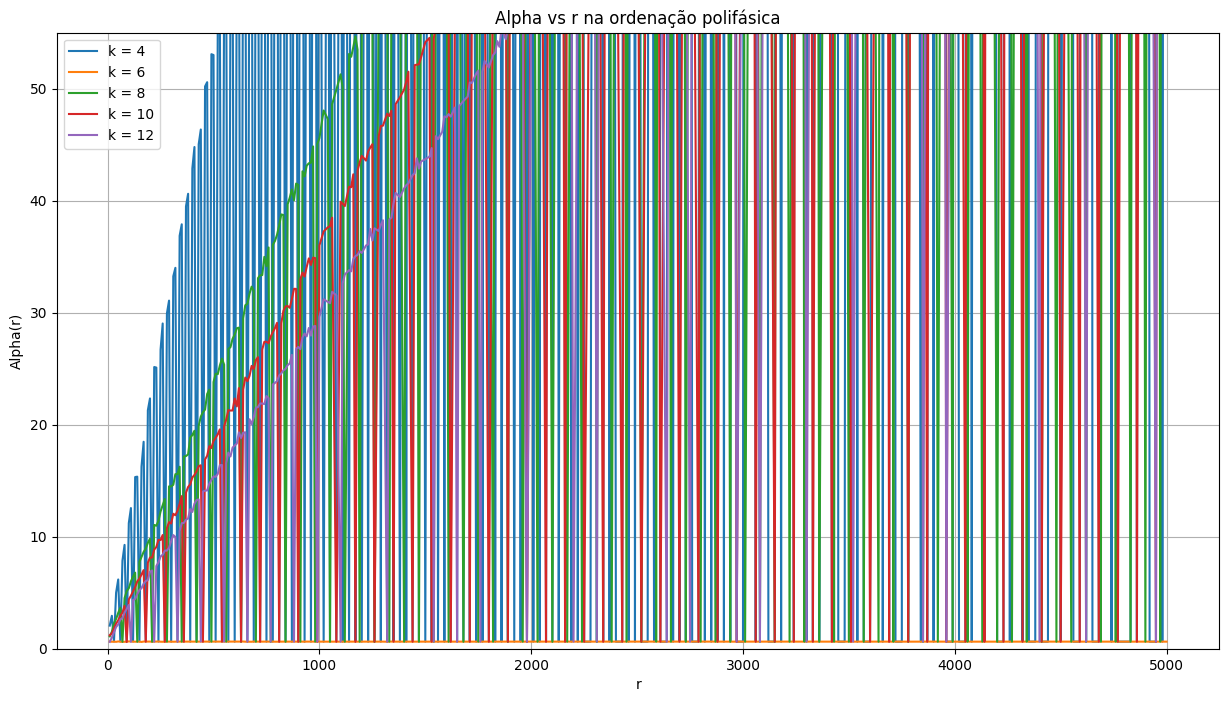

In [26]:
fig = plt.figure(figsize=(15,8))
for c in df.columns:
    plt.plot(df[c], label=f"k = {c}")
plt.legend()
plt.title("Alpha vs r na ordenação polifásica")
plt.xlabel("r")
plt.grid()
plt.ylim(0,55)
plt.ylabel("Alpha(r)")
plt.show()

Cascata

In [27]:
dctt_alpha_C = getAlphaDict(possibles_r,k,100000, 3, Ordenador(), "C",1)

  0%|          | 0/351 [00:00<?, ?it/s, R: 10]

100%|██████████| 351/351 [22:28<00:00,  3.84s/it, R: 5000]


In [28]:
json.dump(dctt_alpha_C, open("dctt_alpha_C.json", "w"))

## Beta(m, 0) para cada método

multiCaminhos: n ta funcionando

In [29]:
# dctt_betas0_B = getBetaDict(possibles_r,6,100000,m, Ordenador(), "B")

Polifasica

In [32]:
dctt_betas0_P = getBetaDict(possibles_r,6,100000,m, Ordenador(), "P",1)

  0%|          | 0/351 [00:00<?, ?it/s, R: 10]

100%|██████████| 351/351 [01:13<00:00,  4.79it/s, R: 5000]


In [33]:
json.dump(dctt_betas0_P, open("dctt_betas0_P.json", "w"))

Cascata

In [34]:
dctt_betas0_C = getBetaDict(possibles_r,6,100000,m, Ordenador(), "C",1)

100%|██████████| 351/351 [01:13<00:00,  4.81it/s, R: 5000]


In [35]:
json.dump(dctt_betas0_C, open("dctt_betas0_C.json", "w"))